## Neural Network

A neural network is computing system modeled after the way our brains work. They consist of a collection of artificial neurons arranged in layers. Each neuron takes in values which are then multiplied by randomly initialized weights before being summed. The obtained value is then passed through an activation function to get an output. A network consists of one input layer, some number of hidden layers, and one output layer. 

<img src="neuralnetwork.png" width=400 />

___

### The MNIST dataset

The MNIST dataset consists of 70,000 28x28 pixel grayscale images of handwritten single digits from 0 to 9. The training set contains 60,000 images and the test set 10,000. For more information you can find the dataset [here](http://yann.lecun.com/exdb/mnist/).

<img src="MnistExamples.png" width=600 />


___

In this notebook we will use the following packages:
- [MLDatasets](https://juliaml.github.io/MLDatasets.jl/latest/)
- [Images](https://juliaimages.org/stable/)
- [TestImages](https://testimages.juliaimages.org/)
- [Plots](http://docs.juliaplots.org/latest/)
___

In [1]:
using MLDatasets
using Images
using TestImages
using Plots

In [2]:
train_x, train_y = MNIST.traindata()
test_x, test_y = MNIST.testdata();

In [3]:
size(train_x)

(28, 28, 60000)

In [4]:
train_x[:, :, 1]

28×28 Array{N0f8,2} with eltype N0f8:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  

The first image in our train data is labeled 5


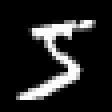

In [5]:
println("The first image in our train data is labeled ", train_y[1])
colorview(Gray, train_x[:, :, 1]')

In [6]:
X = []
Y = []

for i = 1:60000
    push!(X, reshape(train_x[:, :, i], 784))
    y = zeros(10)
    y[train_y[i] + 1] = 1.0
    push!(Y, y)
end
train_data = [x for x in zip(X, Y)]

X = []
Y = []

for i = 1:10000
    push!(X, reshape(test_x[:, :, i], 784))
    y = zeros(10)
    y[test_y[i] + 1] = 1.0
    push!(Y, y)
end
test_data = [x for x in zip(X, Y)];

In [7]:
# Define the activation function and its derivative
σ(x) = 1.0 / (1.0 + exp(-x))

dσ(x) = σ(x) * (1 - σ(x))


# Define a neural network type
mutable struct neural_network
    W
    b
end


function create_network(input_layer_size, hidden_layer_sizes, output_layer_size)
    
    W = [[0.0], randn(hidden_layer_sizes[1], input_layer_size)]
    
    b = [[0.0], randn(hidden_layer_sizes[1])]
    
    for i = 2:length(hidden_layer_sizes)
        push!(W, randn(hidden_layer_sizes[i], hidden_layer_sizes[i-1]))
        push!(b, randn(hidden_layer_sizes[i]))
    end
    
    push!(W, randn(output_layer_size, hidden_layer_sizes[end]))
    push!(b, randn(output_layer_size))
    
    return neural_network(W, b)
end

create_network (generic function with 1 method)

In [8]:
NN = create_network(784, [100, 100, 100], 10)

neural_network(Array{Float64, N} where N[[0.0], [-0.8144514706648833 -0.5059394024362098 … 1.0583747531760794 3.15273388217343; 0.22243507041245725 0.625885163312154 … -0.16478054741018888 -0.6733148456767674; … ; 1.682914635910663 -0.8620034116547436 … 0.006910712866810948 0.9761869166577395; 2.0467089648326557 0.6032683956621298 … 0.08006053508039083 -0.19455251183191416], [-0.7791716794693662 0.38016628189820906 … -1.1362157707955531 -1.5707493746986287; 0.20559772523915631 -1.4403556549105714 … -1.44551187093074 -0.7796628075980673; … ; 0.7505281100039927 0.07501734452545233 … -0.751461913400977 0.38186263806921894; -0.2647301550928282 1.2491332798170849 … 0.7891659597121838 -1.0659852932508747], [0.294784622975771 0.5522120121346179 … 1.6662402838384685 1.0607208016591332; 1.3915281679497336 0.8488371016269436 … 0.22525171191919216 -1.1732695872977825; … ; -0.14672056331735012 0.670155289723494 … 0.026253454172531568 -1.2393701738478453; 0.6218896864802451 0.18944977951814698 … -0

In [9]:
NN.b

5-element Vector{Vector{Float64}}:
 [0.0]
 [0.4746912728759544, 2.0936739721436965, -0.3272281142291027, 0.04121867423483723, 1.2735716433214959, 0.7182307849650224, -0.3854135237727758, -0.05597864718300431, 0.3307461906944588, 0.5104851866996332  …  0.1927432835377815, -0.20279808088192802, -0.01669636909372153, -0.4374566914281731, 1.469860643988911, 0.9126073842419666, -0.9555333292553548, 0.767712347550908, -1.2705032138014043, 0.42893525255510795]
 [-0.8648523278905695, 0.8824931018293763, 1.3322426040684672, -0.0699132259413603, -1.3567332740410178, 1.9615772828651112, -2.529645039400697, -2.6642135761603027, 0.3394188106980532, 0.7357596095984844  …  2.573953567840149, 0.00012757188487820653, 2.4572180918051663, -1.9572519468475196, -0.5941490724267346, -0.29352527367557135, -1.8509338193297167, 0.11468083960533988, 0.6718410458643428, -0.6261789388661483]
 [-0.2291101645367213, 0.28617435065337365, -0.8624624130252352, -0.847956385809448, -0.13471341709807402, 0.62662892382919

In [10]:
for w in NN.W
    println(size(w))
    println("")
end

(1,)

(100, 784)

(100, 100)

(100, 100)

(10, 100)



In [11]:
function forward_pass(network, training_instance)
    Z = [[0.0]]
    A = [training_instance[1]]
    
    for i = 2:length(network.W)
        push!(Z, network.W[i] * A[i-1] + network.b[i])
        push!(A, σ.(Z[i]))
    end
    
    return Z, A
end


function predict(network, training_instance)
    Z, A = forward_pass(network, training_instance)
    return argmax(A[end]) - 1
end


function success_percentage(network, data_set)
    return string("The percentage of correctly classified images is: ", sum([predict(network, x) == argmax(x[2]) - 1 ? 1 : 0 for x in data_set]) / length(data_set) * 100., " %")
end

success_percentage (generic function with 1 method)

In [12]:
success_percentage(NN, test_data)

"The percentage of correctly classified images is: 12.049999999999999 %"

In [13]:
function error_deltas(network, training_instance)
    Z, A = forward_pass(network, training_instance)
    L = size(network.W)[1]
    δ = [(A[end] - training_instance[2]).*dσ.(Z[end])]
    for i = L-1:-1:2
        pushfirst!(δ, (network.W[i + 1]' * δ[1]).*dσ.(Z[i]))
    end
    pushfirst!(δ, [0.0])
    return A, δ
end

error_deltas (generic function with 1 method)

In [14]:
A_test, δ_test = error_deltas(NN, train_data[1])

(Vector{N0f8}[[0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8  …  0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8], [0.384N0f8, 0.969N0f8, 0.0N0f8, 0.0N0f8, 1.0N0f8, 0.263N0f8, 0.776N0f8, 1.0N0f8, 0.0N0f8, 1.0N0f8  …  0.0N0f8, 0.996N0f8, 0.082N0f8, 0.043N0f8, 0.0N0f8, 0.459N0f8, 1.0N0f8, 1.0N0f8, 0.0N0f8, 0.0N0f8], [0.0N0f8, 0.643N0f8, 1.0N0f8, 0.0N0f8, 0.145N0f8, 0.969N0f8, 0.929N0f8, 0.0N0f8, 0.0N0f8, 0.855N0f8  …  0.749N0f8, 1.0N0f8, 0.435N0f8, 1.0N0f8, 0.047N0f8, 0.0N0f8, 0.0N0f8, 0.875N0f8, 0.992N0f8, 0.776N0f8], [0.796N0f8, 0.184N0f8, 0.02N0f8, 0.0N0f8, 0.008N0f8, 0.035N0f8, 0.004N0f8, 1.0N0f8, 0.725N0f8, 0.141N0f8  …  0.667N0f8, 0.988N0f8, 0.0N0f8, 0.569N0f8, 0.89N0f8, 0.839N0f8, 0.0N0f8, 1.0N0f8, 0.145N0f8, 1.0N0f8], [0.576N0f8, 0.004N0f8, 0.18N0f8, 0.98N0f8, 0.957N0f8, 1.0N0f8, 1.0N0f8, 0.992N0f8, 1.0N0f8, 0.008N0f8]], [[0.0], [-0.026553403639375923, -0.001410623479267051, 3.837793894575284e-6, 

In [15]:
δ_test[end]

10-element Vector{Float64}:
 0.14088069056758976
 9.589162639024321e-6
 0.026765587504408245
 0.017031727797788235
 0.039088048316571464
 0.0
 0.0007182302721286295
 0.0078002229258767874
 1.0182388346073657e-6
 4.625429480182246e-5

In [16]:
function make_random_mini_batch(mini_batch_size, data_set)
    k = rand(1:length(data_set) - mini_batch_size)
    return data_set[k:k+mini_batch_size]
end


function mini_batch_update!(network, mini_batch_size, data_set, α)
    batch = make_random_mini_batch(mini_batch_size, data_set)
    L = size(network.W)[1]
    
    A, δ = error_deltas(network, batch[1])
    A_batch = []
    δ_batch = []
    push!(A_batch, A)
    push!(δ_batch, δ)
    
    for i = 2:mini_batch_size
        A, δ = error_deltas(network, batch[i])
        push!(A_batch, A)
        push!(δ_batch, δ)
    end
    
    for l = L:-1:2
        network.W[l] -= (α / mini_batch_size) * sum([δ_batch[i][l] * A_batch[i][l-1]' for i = 1:mini_batch_size])
        network.b[l] -= (α / mini_batch_size) * sum([δ_batch[i][l] for i = 1:mini_batch_size])
    end
end;

In [17]:
for _ = 1:70000
    mini_batch_update!(NN, 15, train_data, 0.06)
end

In [18]:
success_percentage(NN, test_data)

"The percentage of correctly classified images is: 81.73 %"

In [19]:
function show_test_img(i)
    colorview(Gray, test_x[:,:,i]')
end

function show_test_example(network, i, testing_data)
    println("Predicted label: ", predict(network, testing_data[i]))
    println("Actual label: ", argmax(testing_data[i][2]) - 1)
    show_test_img(i)
end

show_test_example (generic function with 1 method)

Predicted label: 0
Actual label: 0


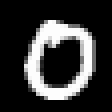

In [24]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted label: 4
Actual label: 4


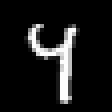

In [25]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted label: 5
Actual label: 5


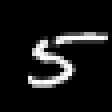

In [29]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)